# 备忘录-数学基础

# 〇. 写在前面
## 0.1 数学符号
| 符号 | 释义 | md写法 |
| - | - | - |
| $x$ | 标量 | `$x$` |
| $\mathbf x$ | 向量 | `$\mathbf x$` | 
| $X$ | 矩阵 | `$X$` |
| $\hat{y}$ | 预测值 | `$\hat{y}$` |
| $\partial$ | 偏导 | `$\partial$` |
| $η$ | | `$η$` | 
| $\lVert \rVert$ | 范数 | `$\lVert \rVert$` |  

## 0.2 (简述)线性回归
> 

回归(regression)是 **一个或多个自变量** 与 **因变量** 之间关系建模方法  
通常有方程
$$
\begin{aligned}
\hat{y} =  f(x) &= w_1 \cdot x_1 + ... + w_d \cdot x_d + b \\ 
&= \mathbf{w}^⊤ \cdot \mathbf{x}+b
\tag{0-2-1} 
\end{aligned}
$$
+ $w_{i}$ 或 $\mathbf{w}$ 称为权重, 权重决定了每个特征对我们预测值的影响
+ $b$ 称为偏置(bias), 偏移量(offset)或截距(intercept)
    - 偏置是指当所有特征都取值为0时，预测值应该为多少。 (即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项) 
    - 如果没有偏置项，我们模型的表达能力将受到限制



## 0.3 one-hot encoding(独热编码)
假设图片集都是$2\times2$的灰度图像, 即分4个像素. 我们可以用一个标量表示每个像素值，每个图像对应四个特征$x_1, x_2, x_3, x_4$.  

此外，假设每个图像属于类别 [猫, 鸡, 狗] 中的一个. 接下来，我们要选择如何表示标签. 最直接的想法是选择
$$
y=\{1, 2, 3\}
\tag{0-3-1}
$$
+ 其中, 整数分别代表狗猫鸡. 

**但是一般的分类问题并不与类别之间的自然顺序有关**, 因此公式(4-1-1)不方便使用. 幸运的是，统计学家发明**独热编码(one-hot encoding)**.    
独热编码的特点
+ 独热编码是一个向量, 它的分量和类别一样多
+ 类别对应的分量设置为1，其他所有分量设置为0

在上述例子中, 标签 $y$将是一个三维向量, 其中$(1, 0, 0)$对应于“猫”、$(0, 1, 0)$对应于“鸡”、 $(0, 0, 1)$对应于“狗”：  
$$
y=\{(1, 0, 0),\ (0, 1, 0),\ (0, 0, 1)\}
\tag{0-3-2}
$$




## 0.4 交叉熵损失函数  
> 损失函数是比较真实值和预测值的差距, 引入交叉熵是为了比较在概率里真实值和预测值的区别  

Cross-entropy Loss Function / Logarithmic Loss / Logistic Loss, 交叉熵可用于定义机器学习和优化中的损失函数。真实概率 ${\displaystyle p_{i}}$ 是真实标签，以及给定的分布 ${\displaystyle q_{i}}$ 是当前模型的预测值。这也称为对数损失(或对数损失或逻辑损失)  

更具体地说，考虑一个二元回归模型，该模型可用于将观察结果分类为两个可能的类别 (通常简单地标记为 ${\displaystyle 0}$ 和 ${\displaystyle 1}$, 例如图片为猫或不是). 
输入特征向量${\displaystyle x}$到模型, 模型计算输出的结果可以理解为一个概率, 作为对观测进行分类的基础. 在逻辑回归中，使用逻辑函数对概率进行建模 
$$
{\displaystyle g(z)= \frac{1}{(1+e^{-z})}}
\tag{0-4-1}
$$
+ $z$ 是输入向量 $x$ 的一个函数, 通常只是一个线性函数

当某样本真实标签为真时, 即$y=1, p=1$, 有预测值
$$
q_{y=1} = {\hat{y}}\equiv g(\mathbf{w} \cdot \mathbf{x} ) = {\frac {1}{1+e^{-\mathbf {w} \cdot \mathbf {x} }}}
\tag{0-4-2}
$$
+ ${\displaystyle q_{i}}$ 和 $\hat y$ 是当前模型的预测值
+ ${\displaystyle \mathbf {w} }$ 为权重向量
    - 可通过一些适当的算法 (例如梯度下降) 进行优化

同理, 当某样本真实标签为假时, 即$y=0, p=0$, 有预测值
$$
q_{y=0} = 1- \hat{y}
\tag{0-4-3}
$$


对于 ${\displaystyle p\in \{y,\ 1-y\}}$ 和 ${\displaystyle q\in \{{\hat {y}},1-{\hat {y}}\}}$, ${\displaystyle p}$ 和 ${\displaystyle q}$ 之间的差异, 可以使用交叉熵来衡量: 
$$
\begin{aligned}
    H(p,q)\ &=\ -\sum _{i}p_{i}\log q_{i}\\ 
    &=\ -y \log {\hat {y}}-(1-y)\ log(1-{\hat {y}})
    \tag{0-4-4}
\end{aligned}
$$


## 0.5 归一化指数函数 - Softmax函数
> 归一化的目的是: 要求模型输出的概率满足非负的且总和为1  

将一个含任意实数的K维向量 ${\displaystyle \mathbf {z} }$ “压缩”到另一个K维实向量 ${\displaystyle \sigma (\mathbf {z} )}$ 中，使得每一个元素的范围都在 ${\displaystyle (0,1)}$ 之间，并且所有元素的和为 $1$.  公式为
$$
\sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}} 
\tag{0-5-1}
$$
+ $j = 1, …, K$

例如, 输入向量 $[1, 2, 3, 4, 1, 2, 3]$ 对应的Softmax函数的值为$[0.024,0.064,0.175,0.475,0.024,0.064,0.175]$


In [39]:
import torch
# 实现方式1: 自建函数实现
## 函数: 实现softmax, 归一化
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition 

## 测试softmax函数
X_before = torch.normal(0, 1,(2, 5))
X_after = softmax(X_before)
X_before, X_after, X_after.sum(1)

# 实现方法2: 调用库
m = torch.nn.Softmax(dim=1)
X_after2 = m(X_before)
X_after2, X_after2.sum(1) 

(tensor([[0.0118, 0.0287, 0.7330, 0.1531, 0.0734],
         [0.0218, 0.6598, 0.1923, 0.0392, 0.0868]]),
 tensor([1., 1.]))

# 一. 损失函数

## 1.1 损失函数
损失函数(Loss Function), 又叫做误差函数，用来衡量算法的运行情况，估量模型的预测值与真实值的不一致程度.

例如, 房产的成交价和估价, 建立损失函数方程, 则有平方损失函数
$$
l(y, \hat{y}) = \frac{1}{2} (y-\hat{y})^2
\tag{1-1-1}
$$
+ $L(y, \hat{y})​$表示损失函数
+ $y$是真实值, 如房产真实成交价
+ $\hat{y}$是预测值, 如房产的预估成交价
    - 同上文公式(0-2-1)

### 1.1.1 损失函数特征
1. **损失函数越小，模型效果越好**, 模型的鲁棒性就越好
    + 当损失函数获得极小值 (目标为 0) 时，$\hat{y}$ 中参数 $m$ 和 $b$ 为最佳, 即找到最佳的回归曲线方程
2. 损失函数是一个非负实值函数
3. 设 $y$ 是真实值, $\hat{y}$ 是预估值通常使用$L(y, \hat{y})​$来表示.

## 1.2 常见的损失函数
​机器学习通过对算法中的目标函数进行不断求解优化，得到最终想要的结果。分类和回归问题中，**通常使用损失函数或代价函数作为目标函数**.
​损失函数用来评价预测值和真实值不一样的程度。通常损失函数越好，模型的性能也越好。
​损失函数可分为经验风险损失函数和结构风险损失函数。经验风险损失函数指预测结果和实际结果的差别，结构风险损失函数是在经验风险损失函数上加上正则项。
​下面介绍常用的损失函数：

### 1.2.1 0-1损失函数
如果预测值和目标值相等，值为0，如果不相等，值为1。
$$
L(Y, f(x)) =
\begin{cases}
1,& Y\ne f(x)\\
0,& Y = f(x)
\tag{1-2-1}
\end{cases}
$$
+ $Y$ 为真实值, 有公式也写作 $y$ 
+ $f(x)$ 为模型输出的预测值, 有公式也写作 $\hat y$ 


一般的在实际使用中，相等的条件过于严格，可适当放宽条件：
$$
L(Y, f(x)) =
\begin{cases}
1,& |Y-f(x)|\geqslant T\\
0,& |Y-f(x)|< T
\tag{1-2-2}
\end{cases}
$$
+ $Y$ 为真实值, 有公式也写作 $y$ 
+ $f(x)$ 为模型输出的预测值, 有公式也写作 $\hat y$ 


### 1.2.2 绝对值损失函数
和0-1损失函数相似，绝对值损失函数表示为：
$$
L(Y, f(x)) = |Y-f(x)|​
\tag{1-2-3}
$$
+ $Y$ 为真实值, 有公式也写作 $y$ 
+ $f(x)$ 为模型输出的预测值, 有公式也写作 $\hat y$ 


### 1.2.3 平方损失函数
$$
L(Y, f(x)) = \sum_N{(Y-f(x))}^2
\tag{1-2-4}
$$
+ $Y$ 为真实值, 有公式也写作 $y$ 
+ $f(x)$ 为模型输出的预测值, 有公式也写作 $\hat y$ 
+ 有写法在前面加系数$\frac{1}{2}$, 目的是在求导的时候方便将2消去

解读:
+ 从最小二乘法和欧几里得距离角度理解。最小二乘法的原理是，最优拟合曲线应该使所有点到回归直线的距离和最小。

### 1.2.4 对数损失函数
$$
L(Y, P(Y|X)) = -\log{P(Y|X)}
\tag{1-2-5}
$$
+ $Y$ 为真实值, 有公式也写作 $y$ 
+ $f(x)$ 为模型输出的预测值, 有公式也写作 $\hat y$ 

常见的逻辑回归使用的就是对数损失函数，有很多人认为逻辑回归的损失函数是平方损失，其实不然。逻辑回归它假设样本服从伯努利分布（0-1分布），进而求得满足该分布的似然函数，接着取对数求极值等。逻辑回归推导出的经验风险函数是最小化负的似然函数，从损失函数的角度看，就是对数损失函数。

### 1.2.5 指数损失函数
指数损失函数的标准形式为：
$$
L(Y, f(x)) = \exp(-Yf(x))
\tag{1-2-6}
$$
+ $Y$ 为真实值, 有公式也写作 $y$ 
+ $f(x)$ 为模型输出的预测值, 有公式也写作 $\hat y$ 

例如AdaBoost就是以指数损失函数为损失函数。

### 1.2.6 Hinge损失函数
Hinge损失函数的标准形式如下：
$$
L(y) = \max{(0, 1-ty)}
\tag{1-2-7}
$$
+ $Y$ 为真实值, 有公式也写作 $y$ 
+ $f(x)$ 为模型输出的预测值, 有公式也写作 $\hat y$ 


统一的形式：
$$
L(Y, f(x)) = \max{(0, Yf(x))}
$$

其中y是预测值，范围为(-1,1)，t为目标值，其为-1或1。

在线性支持向量机中，最优化问题可等价于

$$
\underset{\min}{w,b}\sum_{i=1}^N (1-y_i(wx_i+b))+\lambda\Vert w\Vert ^2
$$

上式相似于下式

$$
\frac{1}{m}\sum_{i=1}^{N}l(wx_i+by_i) + \Vert w\Vert ^2
$$

其中$l(wx_i+by_i)$是Hinge损失函数，$\Vert w\Vert ^2$可看做为正则化项。

# 二. 导数计算 

## 2.1 标量的导数(一般求导)
$$
{\displaystyle 
    {f'(x) = \frac {f(x)-f(a)}{x-a}}
}
$$
## 2.2 亚导数(拓展到不可导点)
> 将导数拓展到不可微的函数, 将导数（斜率）取为一个范围内的任意值。   

例如
$$
y= |x|
$$
其导数可以记为：
$$ 
\frac{\partial |x|}{\partial x} = 
    \begin{cases}
        1,\quad &x >0\\ 
        -1,\quad &x >0\\ 
        a,\quad &x = 0,a\in[-1,1]
    \end{cases}
$$

## 2.3 梯度(拓展到向量)
### 2.3.0 为什么要引入梯度概念
在机器学习中逐步逼近、迭代求解最优化时，经常会使用到梯度，沿着梯度向量的方向是函数增加的最快，容易找最大值。反过来，沿着梯度向量相反的地方，梯度减少的最快，容易找到最小值。  
示例: 


### 2.3.1 梯度的概念

| | 标量 $x$ | 向量 $\mathbf{x}$ |
| - | - | - |
| 标量 $y$ | $\frac{\partial y}{\partial x}$ | $\frac{\partial y}{\partial \mathbf{x}}$ | 
| 向量 $\mathbf{y}$  | $\frac{\partial \mathbf{y}}{\partial x}$ | $\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$ |

其中
设
$$
\begin{aligned}
    &y = a \cdot x_1^2 + b\cdot x_2^2 + c\cdot x_3^2  \\
    &\mathbf y = \begin{bmatrix}
        y_1 \\ 
        y_2 \\ 
        \cdots \\
        y_m
    \end{bmatrix} \\
    &x = x  \\
    &\mathbf x = \begin{bmatrix}
        x_1 \\ 
        x_2 \\ 
        \cdots \\
        x_n
    \end{bmatrix}
\end{aligned}
$$
则有以下四个公式
$$
\begin{aligned}
    &\frac{\partial y}{\partial x} 
        = 2a \cdot x_1 + 2b\cdot x_2 + 2c\cdot x_3
    \\
    &\frac{\partial y}{\partial \mathbf{x}} 
        = \begin{bmatrix}
            \frac{∂y}{∂x_1}, \frac{∂y}{∂x_2}, \frac{∂y}{∂x_3}
        \end{bmatrix}  (列变行)
    \\
    &\frac{\partial \mathbf{y}}{\partial x} 
        = \begin{bmatrix}
            \frac{∂y_1}{∂x} \\ 
            \frac{∂y_2}{∂x} \\ 
            \cdots \\
            \frac{∂y_n}{∂x}
        \end{bmatrix} 
    \\
    &\frac{\partial \mathbf{y}}{\partial \mathbf{x}} 
        = \left[\begin{array}{ccc}
            \frac{∂y_1}{∂\mathbf{x}} \\
            \frac{∂y_2}{∂\mathbf{x}} \\ 
            \cdots \\ 
            \frac{∂y_n}{∂\mathbf{x}} 
            \end{array}\\   
        \right] 
        = \left[\begin{array}{ccc}
            \frac{∂y_1}{∂x_1}, \frac{∂y_1}{∂x_2}, \cdots, \frac{∂y_1}{∂x_n} \\
            \frac{∂y_2}{∂x_1}, \frac{∂y_2}{∂x_2}, \cdots, \frac{∂y_2}{∂x_n} \\ 
            \cdots \\ 
            \frac{∂y_n}{∂x_1}, \frac{∂y_n}{∂x_2}, \cdots, \frac{∂y_n}{∂x_n}
            \end{array}\\   
        \right]
\end{aligned}
$$

注释: 
1. 损失函数通常要设计成标量[问题21](https://www.bilibili.com/video/BV1KA411N7Px?p=3&vd_source=d8702308ded7a25961207aebfb814cfd), 为了便于求导不至于变成更大的矩阵

> 更多可参考: 1. [导数的本质](https://zhuanlan.zhihu.com/p/263777564)

## 2.4 PY实现-自动求导
### A. 一维示例
已知房产数据, 2平米的房产, 买5元(`data = [2, 5]`).  
建立回归方程 $\hat{y} = f(x) = w \cdot x + b$, 初始设置`w=2.5, b=5`, 即 $\hat{y} = 2.5 \cdot x + 5$.  (后面通过梯度下降找到最合适的w和b)

步骤:
1. 初始化权重w和偏移量b
    $w_0 = 2.5, b_0 = 5$
2. 初始化回归曲线函数
    $\hat{y} = f(x) = 2.5 \cdot x + 5$
3. 初始化实际数据  
    x =  2   
    y =  5
4. 计算预测值
    $\hat{y}|_{x=2} = f(2) = 10$
5. 计算损失函数  
    根据平方损失函数公式(1-2-4)  
    $$
    L(y, f(x)) = (y-f(x))^2
    $$
6. 求梯度
    利用`tensor.backward()`方法
    $$
    权重的梯度: \frac{\partial L}{\partial w} = \frac{\partial L}{\partial f(x)} \cdot \frac{\partial f(x)}{\partial w} = 2(y - f(x))\cdot (-x) = 2*(5-10)*(-2) = 20 
    $$
    
    $$
    偏移量的梯度: \frac{\partial L}{\partial b} = \frac{\partial L}{\partial f(x)} \cdot \frac{\partial f(x)}{\partial b} = 2(y - f(x))\cdot (-1) = 2*(5-10)*(-1) = 10 
    $$
    
7. 查看梯度
    利用`tensor.grad`方法实现

8. [可选]手动检验梯度运算是否准确
    利用第6步的公式
    
9. 根据梯度下降法的公式可以得到参数的更新公式：
    $$
    w = w − η\frac{∂L}{∂w}\\ 
    b = b - η\frac{∂L}{∂b}
    $$
    > 关于学习率$η$见后文, [3.3章节](#3)




In [1]:
import torch
# Step 1 初始化权重w和偏移量b
w = torch.tensor([2.5], requires_grad=True)     # 一定要设置属性requires_grad=True
b = torch.tensor([5.], requires_grad=True)
print('权重w = ', w, '\n偏移量b = ', b)

权重w =  tensor([2.5000], requires_grad=True) 
偏移量b =  tensor([5.], requires_grad=True)


In [2]:
# Step 2 初始化回归函数
def func(x): 
    # 即回归曲线 f(x) = 2.5 * x + 5
    global w, b
    return w * x + b

In [3]:
# Step 3 初始化实际数据
data = [[2, 5]]
x = data[0][0]
y = data[0][1]
print('x = ', x, '\ny = ', y)

x =  2 
y =  5


In [4]:
# Step 4 计算预测值
predict = func(x)   # 即f(x=2) = predict
predict

tensor([10.], grad_fn=<AddBackward0>)

In [5]:
# Step 5 计算损失函数
loss = (y - predict)**2
loss

tensor([25.], grad_fn=<PowBackward0>)

In [6]:
# Step 6 求梯度
loss.backward()
# 查看计算图中是否保留了计算梯度的函数
print(loss.grad_fn) # (非必要)

In [7]:
# Step 7 查看梯度
# 向后传播发生后， 查看模型参数 w 记录的梯度值
print(w.grad)   # 已记录
print(b.grad)   # 已记录


tensor([20.])
tensor([10.])


In [8]:
# Step 8 [可选]手动检验梯度运算是否准确
w0 = 2 * (y - (w * x + b)) * (-1 * x)
print(w0 == w.grad)

tensor([True])


# 三. 线性回归

## 3.1 线性回归概念
+ 在[0.2章节](#02-简述线性回归) 已经简单说明了线性方程的定义. 
+ 在[1.2.3章节](#123-平方损失函数)已经说了平方误差的计算.
将上述公式(0-2-1)和(1-2-4)整理, 得到训练损失公式:
$$
    \begin{aligned}
        L(\mathbf X, \mathbf y, \mathbf w, b) 
        &= \frac{ \frac{1}{2}(y_1-\hat{y_1})^2 + \frac{1}{2}(y_2-\hat{y_2})^2 + \cdots +  \frac{1}{2}(y_n-\hat{y_n})^2 }{n} \\
        &= \frac{1}{2n} \sum_{i=1}^n (y_i - \lang x_i, \mathbf w\rang - b)^2 \\
        &= \frac{1}{2n} \lVert \mathbf y - \mathbf X \cdot \mathbf w - b\rVert ^2
        \tag{3-1-1}
    \end{aligned}
$$
+ $L$ 损失函数
+ $\mathbf X$ 预测值  
    - $\mathbf X = [\ x_1, x_2, \cdots, x_n\ ]^T$
+ $\mathbf y$ 真实值
    - $\mathbf y = [\ y_1, y_2, \cdots, y_n\ ]^T$
+ $\mathbf w$ 权重的向量组
    - $\mathbf w = [w_1, w_2, \cdots w_n]$
+ $b$ 偏移量
+ $\hat{y_i}$ 真实值
+ $\lang \cdots\rang$ 内积
+ $||\cdots||$ 范数
    - 默认为2-范数($||\cdots||_2$)
    - 没看懂



然后, 求出最小化损失来学习参数
$$
w^*, b^* = arg\ min_{\mathbf w, b}\ L(\mathbf X, \mathbf y, \mathbf w, b) 
\tag{3-1-2}
$$
+ $w^*, b^*$ 就是可以最小化损失的参数


## 3.2 数值解和解析解(显示解)
> analytical solution, 解析解

### 3.2.0 什么是数值解和解析解
1. 什么是数值解
    例如小车移动, 根据初始速度, 加速度等信息可以求得每一时刻的小车位置. 这一系列的结果就是数值解.

2. 什么是解析解
    依旧是小车移动, 用一个函数表示小车每个时刻的移动位置, 就是解析解.

### 3.2.1 线性回归中使用解析解简化问题
将公式(3-1-2)线性回归的解用一个公式简单地表达出来. 
使用方法:
1. 将偏差加入权重   
    将一个全1的特征值加入预测值
    $$
    \mathbf X \larr [\mathbf X, 1]
    $$
    将偏差$b$加入权重
    $$
    \mathbf w \larr 
    \left[ 
        \begin{array}{ccc}
            \mathbf X \\ 
            b 
        \end{array} 
    \right]
    $$


2. 整合进公式(3-1-1)
    $$
    \begin{aligned}
    L(\mathbf X, \mathbf y, \mathbf w) = \frac{1}{2n} \lVert \mathbf y - \mathbf X \cdot \mathbf w \rVert ^2
    \tag{3-2-1}
    \end{aligned}
    $$
    
3. 损失函数是凸函数, 求损失函数公式(3-2-1)的梯度
    $$
    \frac{\partial{L(\mathbf X, \mathbf y, \mathbf w)}}{\partial{\mathbf w}} = \frac{1}{n} ( \mathbf y - \mathbf X \cdot \mathbf w )^T \ \mathbf X
    \tag{3-2-2}
    $$
    令公式(3-2-2)为0, 处理提取出$\mathbf w$,   
    $$
    \begin{aligned}
        \frac{\partial{L(\mathbf X, \mathbf y, \mathbf w)}}{\partial{\mathbf w}} &= 0 \\
        \frac{1}{n} ( \mathbf y - \mathbf X \cdot \mathbf w )^T \ \mathbf X &= 0 \\
        \mathbf w^* &= (\mathbf X^T \mathbf X)^{-1} \mathbf X \mathbf y
    \end{aligned}
    $$ 


## 3.3 梯度下降
### A. 基础优化方法
![image.png](./img/梯度下降示意图.png)
1. 挑选一个初始值 $\mathbf w_0$
2. 重复迭代得到新的$\mathbf w_i$, 直到得到最优解
    有跌倒参数$t=1,2,3$
    $$
    \mathbf w_t = \mathbf w_{t-1} - η\frac{\partial L}{\partial \mathbf w_{t-1}}
    \tag{3-3-1} 
    $$
    + $η$ 学习率, 步长的超参数
        - 自己设定
        > 超参数即调参对象
    + $\frac{\partial L}{\partial \mathbf w_{t-1}}$ 梯度
        - 梯度是函数值增加最快的方向. 因此, 为使得梯度下降最快, 要式中要减去梯度 (即, 负梯度)
        - 沿梯度方向将增加损失函数值



## 示例1: 线性回归的原始写法

In [19]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

示例一组数据
feature: tensor([-0.5355, -0.8907]) 
label: tensor([6.1440])


<generator object data_iter at 0x000002ABA85583D0>

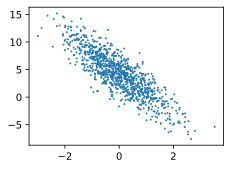

In [20]:
# Step 0 人为设值
true_w = torch.tensor([2, -3.4])    # 设置真实的w, 训练完成后看和这个真实w值相差多少
true_b = 4.2                        # 设置真实的b, 同上

# 制作人工数据集
def synthetic_data(w, b, num_examples):  #@save
    '''
    通过方程y=x1w1+x2w2+b+噪声, 生成一组人为模拟数据
    w: 权重向量
    b: 偏移量
    num_examples: 产生数据量
    RETURN: 
    '''
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

# features: 试验数据, e.g. 面积, 年限
# labels: 试验数据结果, e.g. 房屋实际售价
features, labels = synthetic_data(true_w, true_b, 1000)  
print('示例一组数据\nfeature:', features[0],'\nlabel:', labels[0]) 

# 画图
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), 
                labels.detach().numpy(), 1);


# 打乱数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

data_iter(10, features, labels)

In [21]:
# Step1 设置参数
# 设置初始权重w和偏移量b
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 设置超参数
batch_size = 10     # 批量大小
lr = 0.3           # lr 学习率
num_epochs = 3      # 训练次数

print('w = ', w, ', b = ', b)
print('batch_size = ', batch_size, ', lr = ', lr, ', num_epochs = ', num_epochs)

w =  tensor([[0.0009],
        [0.0033]], requires_grad=True) , b =  tensor([0.], requires_grad=True)
batch_size =  10 , lr =  0.3 , num_epochs =  3


In [22]:
# Step 2 训练
# 定义模型
def linreg(X, w, b):  #@save
    '''
    线性回归模型y_hat = X W +b
    '''
    return torch.matmul(X, w) + b

# 定义损失函数
def squared_loss(y_hat, y):  #@save
    '''
    均方损失
    '''
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# 定义梯度下降算法
def sgd(params, lr, batch_size):  #@save
    '''
    定义优化算法, 迭代更新参数(权重和偏移量)
    params: 参数包括w和b
    lr: 学习率
    batch_size: 批量大小
    '''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_() # 不要梯度计算

In [23]:
# 训练
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = squared_loss(linreg(X, w, b), y)  # X和y的小批量损失
        # print('\nupdate \nw = ', w, '\nb = ', b)
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()  # https://zhuanlan.zhihu.com/p/427853673
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = squared_loss(linreg(features, w, b), labels)
        print(f'epoch {epoch + 1}, squared_loss {float(train_l.mean()):f}')

epoch 1, squared_loss 0.000050
epoch 2, squared_loss 0.000049
epoch 3, squared_loss 0.000054


In [24]:
# Step 3 查看训练结果
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0026,  0.0009], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0005], grad_fn=<RsubBackward1>)


## 示例2：线性回归的简洁写法

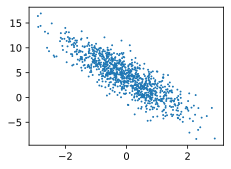

In [25]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

# Step 0 准备工作
# 设置真实的w和b, 用于生成模拟数据
true_w = torch.tensor([2, -3.4])
true_b = 4.2
# 调用d2l生成1k个模拟数据
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
# 生成数据集
dataset = data.TensorDataset(*(features, labels))

# 画图
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), 
                labels.detach().numpy(), 1);

# 读取数据集
data_iter = data.DataLoader(dataset, batch_size=10, shuffle=True)      # shuffle=True表示是否希望数据迭代器对象在每个迭代周期内打乱数据
data_iter
# next(iter(data_iter)) # 如果要看data_iter的值. iter()是强制转换, next是查看下一批次的数据(从第一批开始)

In [26]:
# nn是神经网络的缩写
from torch import nn

# Step 1 定义参数/模型
# 定义线性方程
net = nn.Sequential(nn.Linear(2, 1))        # (2, 1)即2权重自变量1因变量, y = w1x1+w2x2+b

# 定义权重w和偏移量b
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

# 定义批次大小
batch_size = 10

# 定义损失函数, 平方损失(MSE)
loss = nn.MSELoss()

# 定义梯度下降算法, 学习率0.03
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [27]:
# Step 2 训练
num_epochs = 3      # 训练3次
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)     # 计算损失函数
        trainer.zero_grad()     # 先清空历史梯度
        l.backward()            # 计算梯度
        trainer.step()          # 根据梯度进行模型更新

    # 计算目前损失率, 并输出
    l = loss(net(features), labels)     
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000282
epoch 2, loss 0.000100
epoch 3, loss 0.000100


In [28]:
# Step 3 训练结果
w = net[0].weight.data
print('w的估计误差: ', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差: ', true_b - b)

w的估计误差:  tensor([ 0.0002, -0.0002])
b的估计误差:  tensor([0.0010])


# 四. 分类算法  
假设有一个包含 $[猫, 狗, 猪]$ 图片数据集, 每个图都是$2\times2$的灰度图像, 即分4个像素. 我们可以用一个标量表示每个像素值，每个图像对应四个特征$x_1, x_2, x_3, x_4$.

## 4.1 网络架构
根据上文的描述, 建立一个有多个输出的模型，每个类别对应一个输出. 根据示例建立方程:
$$
\begin{aligned}
    q_1 = x_1w_{11} + x_2w_{12} +x_3w_{13} + x_4w_{14} + b_1    \\
    q_2 = x_1w_{21} + x_2w_{22} +x_3w_{23} + x_4w_{24} + b_2    \\
    q_3 = x_1w_{31} + x_2w_{32} +x_3w_{33} + x_4w_{34} + b_3    \\
    \tag{4-1-1}
\end{aligned}
$$
+ $q_i$ 为预测为类别1 (如, 预测为猫) 的概率
+ $w_i$ 为权重
+ $x_i$ 为输入的特征值
+ $b_i$ 为偏置/偏移量

计算过程类似一个单层神经网络, 如下图
![分类算法网络架构](./img/分类算法网络架构.png)

## 4.2 分类损失函数
(本例子将使用**最大似然估计**) 根据0.4章和0.5章可知, 结合公式(0-4-4), 并用公式(0-5-1)对$q_j$归一化, 得到
$$
\begin{aligned}
    l(y, \hat y) &= -\sum_{j=1}^{K} y_{j}\log{ \frac{ e^{\hat{y_j}} }{ \sum_{i=1}^{N} e^{\hat{y_i}}  } } \\ 
    &= \sum_{j=1}^{K} y_{j} \log \sum_{i=1}^{N} e^{\hat{y_i}}  - \sum_{j=1}^{K} y_{j} \hat{y_j} \\
    &= \log \sum_{i=1}^{N} e^{\hat{y_i}}  - \sum_{j=1}^{K} y_{j} \hat{y_j}
    \tag{4-2-1}
\end{aligned}
$$
+ $l(y, \hat y)$ 为关于真实值 $y$ 和预测值 $\hat y$ 的损失函数
+ $K$ 为该分类案例包含K个类别
    - $j$ 为第 j 类
+ $N$ 为自变量的个数
    - 例如一个图像是 $2\times2$ 像素, 并按像素大小划分则需要四个自变量(如式(4-1-1))

对上式(4-2-1)求偏导, 得
$$
\begin{aligned}
    \frac{ \partial{l(y, \hat y)} }{\partial{\hat y}} &= \frac{ e^{\hat y_j} }{ \sum_{i=1}^N e^{\hat{y_i}}} - y_j \\
    &= softmax(q)_i - y_j
    \tag{4-2-2}
\end{aligned}
$$






## 4.3 分类算法的实现
1. 数据集
    Fashion-MNIST数据集, 包含10类7万张时尚产品的28 × 28灰度图像, 每类7 000张图像
    + 训练集有6万张图像，测试集有1万张图像
    + 数据集获取
        - [github](https://github.com/zalandoresearch/fashion-mnist)
        - 直接加载到内存
            ```python
            import torch
            from d2l import torch as d2l

            train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
            ```


In [3]:
import torch
from IPython import display
from d2l import torch as d2l

### 第一步， 基础信息设置
设置超参数， 读取数据等

In [4]:
# 设置超参数
batch_size = 256    # 批量大小

# 加载数据
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
num_inputs = 784    # 数据是28x28=784像素的图片
num_outputs = 10    # 有十个类别, 衣服, 鞋子等

# 初始化权重w和偏置b
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [24]:
# 实现softmax函数, 参考公式(0-5-1)
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

# 实现softmax回归模型, 参考公式()
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)


# 定义真实值
y = torch.tensor([0, 2])    # 第一个图片是类别1(如鞋子), 第二个图片是列表3(如裤子)
# 定义初始预测值
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])    # 第一个预测
print(y_hat[0, 1], y)

# 交叉损失熵函数
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)


y_hat[range(len(y_hat)), y]

tensor(0.3000) tensor([0, 2])


tensor([0.1000, 0.5000])

In [25]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [7]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

In [8]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [9]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

evaluate_accuracy(net, test_iter)

0.1649

In [10]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [11]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [12]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [13]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

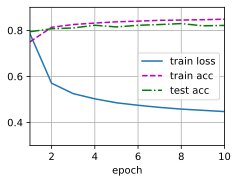

In [14]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

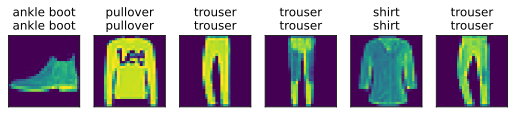

In [15]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)